In [8]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [2]:
class GDRegressor(BaseEstimator):

    def __init__(self, eta=10**-3, n_iter=10, quiet=False):
        self.mse_ = []
        self.weights_ = []
        self.params = {}
        self.params['eta'] = eta
        self.params['n_iter'] = n_iter
        self.params['quiet'] = quiet
        super(GDRegressor, self).set_params(**self.params)
    
    def fit(self, X, y):
        self.w = [0] * (len(X[0]) + 1)
        
        for epoch in range(self.params['n_iter']):
            derivative_w0 = 0
            derivative_wn = [0] * len(X[0])
            for i in range(len(y)):
                y_pred = self.predict([X[i]])[0]
                error = y_pred - y[i]
                derivative_w0 += error
                for j in range(len(X[i])):
                    derivative_wn[j] += error * X[i][j]
            
            self.w[0] = self.w[0] - self.params['eta'] * derivative_w0
            for j in range(len(X[i])):
                self.w[j+1] = self.w[j+1] - self.params['eta'] * derivative_wn[j]
            mse = mean_squared_error(y, self.predict(X))

            self.mse_.append(mse)
            self.weights_.append(self.w.copy())

            if not self.params['quiet']:
                out = f'>epoch={epoch}, mse={mse:.6f}'
                for i in range(len(self.w)):
                    out += f', w{i}={self.w[i]:.6f}'
                print(out)

        return self

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            pred = self.w[0]
            for j in range(len(X[i])):
                pred += self.w[j+1]*X[i][j]
            y_pred.append(pred)
        return y_pred

In [3]:
gd = GDRegressor(n_iter=1000)
# XOR dataset
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y = np.array([1, 1, 0, 0])
gd.fit(X, y)

>epoch=0, mse=0.497009, w0=0.002000, w1=0.001000, w2=0.001000
>epoch=1, mse=0.494057, w0=0.003988, w1=0.001993, w2=0.001993
>epoch=2, mse=0.491141, w0=0.005964, w1=0.002979, w2=0.002979
>epoch=3, mse=0.488263, w0=0.007928, w1=0.003958, w2=0.003958
>epoch=4, mse=0.485420, w0=0.009881, w1=0.004930, w2=0.004930
>epoch=5, mse=0.482614, w0=0.011822, w1=0.005896, w2=0.005896
>epoch=6, mse=0.479843, w0=0.013751, w1=0.006855, w2=0.006855
>epoch=7, mse=0.477107, w0=0.015668, w1=0.007807, w2=0.007807
>epoch=8, mse=0.474405, w0=0.017574, w1=0.008752, w2=0.008752
>epoch=9, mse=0.471738, w0=0.019469, w1=0.009690, w2=0.009690
>epoch=10, mse=0.469104, w0=0.021352, w1=0.010622, w2=0.010622
>epoch=11, mse=0.466504, w0=0.023224, w1=0.011548, w2=0.011548
>epoch=12, mse=0.463936, w0=0.025085, w1=0.012467, w2=0.012467
>epoch=13, mse=0.461400, w0=0.026935, w1=0.013379, w2=0.013379
>epoch=14, mse=0.458897, w0=0.028774, w1=0.014285, w2=0.014285
>epoch=15, mse=0.456425, w0=0.030602, w1=0.015185, w2=0.015185
>e

>epoch=129, mse=0.308122, w0=0.181850, w1=0.084605, w2=0.084605
>epoch=130, mse=0.307541, w0=0.182784, w1=0.084988, w2=0.084988
>epoch=131, mse=0.306968, w0=0.183713, w1=0.085367, w2=0.085367
>epoch=132, mse=0.306401, w0=0.184636, w1=0.085744, w2=0.085744
>epoch=133, mse=0.305842, w0=0.185555, w1=0.086117, w2=0.086117
>epoch=134, mse=0.305289, w0=0.186468, w1=0.086488, w2=0.086488
>epoch=135, mse=0.304743, w0=0.187376, w1=0.086855, w2=0.086855
>epoch=136, mse=0.304204, w0=0.188279, w1=0.087220, w2=0.087220
>epoch=137, mse=0.303672, w0=0.189177, w1=0.087582, w2=0.087582
>epoch=138, mse=0.303146, w0=0.190070, w1=0.087941, w2=0.087941
>epoch=139, mse=0.302626, w0=0.190958, w1=0.088297, w2=0.088297
>epoch=140, mse=0.302113, w0=0.191841, w1=0.088650, w2=0.088650
>epoch=141, mse=0.301607, w0=0.192719, w1=0.089000, w2=0.089000
>epoch=142, mse=0.301106, w0=0.193593, w1=0.089348, w2=0.089348
>epoch=143, mse=0.300612, w0=0.194461, w1=0.089693, w2=0.089693
>epoch=144, mse=0.300124, w0=0.195324, w

>epoch=257, mse=0.270353, w0=0.267991, w1=0.114588, w2=0.114588
>epoch=258, mse=0.270228, w0=0.268461, w1=0.114708, w2=0.114708
>epoch=259, mse=0.270105, w0=0.268928, w1=0.114827, w2=0.114827
>epoch=260, mse=0.269984, w0=0.269393, w1=0.114945, w2=0.114945
>epoch=261, mse=0.269864, w0=0.269856, w1=0.115061, w2=0.115061
>epoch=262, mse=0.269745, w0=0.270316, w1=0.115176, w2=0.115176
>epoch=263, mse=0.269627, w0=0.270774, w1=0.115290, w2=0.115290
>epoch=264, mse=0.269511, w0=0.271230, w1=0.115403, w2=0.115403
>epoch=265, mse=0.269396, w0=0.271684, w1=0.115514, w2=0.115514
>epoch=266, mse=0.269283, w0=0.272135, w1=0.115624, w2=0.115624
>epoch=267, mse=0.269170, w0=0.272584, w1=0.115733, w2=0.115733
>epoch=268, mse=0.269059, w0=0.273031, w1=0.115840, w2=0.115840
>epoch=269, mse=0.268949, w0=0.273475, w1=0.115947, w2=0.115947
>epoch=270, mse=0.268841, w0=0.273917, w1=0.116052, w2=0.116052
>epoch=271, mse=0.268733, w0=0.274358, w1=0.116156, w2=0.116156
>epoch=272, mse=0.268627, w0=0.274795, w

>epoch=385, mse=0.261659, w0=0.313074, w1=0.121849, w2=0.121849
>epoch=386, mse=0.261625, w0=0.313335, w1=0.121858, w2=0.121858
>epoch=387, mse=0.261591, w0=0.313594, w1=0.121865, w2=0.121865
>epoch=388, mse=0.261558, w0=0.313852, w1=0.121873, w2=0.121873
>epoch=389, mse=0.261525, w0=0.314109, w1=0.121879, w2=0.121879
>epoch=390, mse=0.261492, w0=0.314365, w1=0.121885, w2=0.121885
>epoch=391, mse=0.261460, w0=0.314620, w1=0.121891, w2=0.121891
>epoch=392, mse=0.261427, w0=0.314874, w1=0.121896, w2=0.121896
>epoch=393, mse=0.261395, w0=0.315127, w1=0.121901, w2=0.121901
>epoch=394, mse=0.261364, w0=0.315379, w1=0.121905, w2=0.121905
>epoch=395, mse=0.261332, w0=0.315630, w1=0.121908, w2=0.121908
>epoch=396, mse=0.261301, w0=0.315880, w1=0.121911, w2=0.121911
>epoch=397, mse=0.261270, w0=0.316128, w1=0.121914, w2=0.121914
>epoch=398, mse=0.261240, w0=0.316376, w1=0.121916, w2=0.121916
>epoch=399, mse=0.261209, w0=0.316623, w1=0.121917, w2=0.121917
>epoch=400, mse=0.261179, w0=0.316869, w

>epoch=513, mse=0.258823, w0=0.339495, w1=0.119547, w2=0.119547
>epoch=514, mse=0.258808, w0=0.339659, w1=0.119510, w2=0.119510
>epoch=515, mse=0.258794, w0=0.339823, w1=0.119472, w2=0.119472
>epoch=516, mse=0.258779, w0=0.339985, w1=0.119434, w2=0.119434
>epoch=517, mse=0.258764, w0=0.340148, w1=0.119395, w2=0.119395
>epoch=518, mse=0.258750, w0=0.340310, w1=0.119357, w2=0.119357
>epoch=519, mse=0.258735, w0=0.340471, w1=0.119318, w2=0.119318
>epoch=520, mse=0.258721, w0=0.340632, w1=0.119279, w2=0.119279
>epoch=521, mse=0.258707, w0=0.340792, w1=0.119240, w2=0.119240
>epoch=522, mse=0.258692, w0=0.340952, w1=0.119201, w2=0.119201
>epoch=523, mse=0.258678, w0=0.341111, w1=0.119161, w2=0.119161
>epoch=524, mse=0.258664, w0=0.341270, w1=0.119122, w2=0.119122
>epoch=525, mse=0.258650, w0=0.341429, w1=0.119082, w2=0.119082
>epoch=526, mse=0.258636, w0=0.341587, w1=0.119042, w2=0.119042
>epoch=527, mse=0.258622, w0=0.341744, w1=0.119001, w2=0.119001
>epoch=528, mse=0.258608, w0=0.341901, w

>epoch=641, mse=0.257298, w0=0.357179, w1=0.113451, w2=0.113451
>epoch=642, mse=0.257288, w0=0.357296, w1=0.113396, w2=0.113396
>epoch=643, mse=0.257278, w0=0.357414, w1=0.113341, w2=0.113341
>epoch=644, mse=0.257269, w0=0.357531, w1=0.113287, w2=0.113287
>epoch=645, mse=0.257259, w0=0.357647, w1=0.113232, w2=0.113232
>epoch=646, mse=0.257249, w0=0.357764, w1=0.113177, w2=0.113177
>epoch=647, mse=0.257239, w0=0.357880, w1=0.113122, w2=0.113122
>epoch=648, mse=0.257229, w0=0.357996, w1=0.113066, w2=0.113066
>epoch=649, mse=0.257220, w0=0.358112, w1=0.113011, w2=0.113011
>epoch=650, mse=0.257210, w0=0.358227, w1=0.112956, w2=0.112956
>epoch=651, mse=0.257200, w0=0.358342, w1=0.112901, w2=0.112901
>epoch=652, mse=0.257191, w0=0.358458, w1=0.112845, w2=0.112845
>epoch=653, mse=0.257181, w0=0.358572, w1=0.112790, w2=0.112790
>epoch=654, mse=0.257171, w0=0.358687, w1=0.112734, w2=0.112734
>epoch=655, mse=0.257162, w0=0.358801, w1=0.112679, w2=0.112679
>epoch=656, mse=0.257152, w0=0.358915, w

>epoch=769, mse=0.256173, w0=0.370542, w1=0.106073, w2=0.106073
>epoch=770, mse=0.256165, w0=0.370635, w1=0.106014, w2=0.106014
>epoch=771, mse=0.256157, w0=0.370729, w1=0.105954, w2=0.105954
>epoch=772, mse=0.256149, w0=0.370822, w1=0.105895, w2=0.105895
>epoch=773, mse=0.256141, w0=0.370915, w1=0.105836, w2=0.105836
>epoch=774, mse=0.256133, w0=0.371008, w1=0.105776, w2=0.105776
>epoch=775, mse=0.256125, w0=0.371101, w1=0.105717, w2=0.105717
>epoch=776, mse=0.256118, w0=0.371194, w1=0.105658, w2=0.105658
>epoch=777, mse=0.256110, w0=0.371286, w1=0.105598, w2=0.105598
>epoch=778, mse=0.256102, w0=0.371379, w1=0.105539, w2=0.105539
>epoch=779, mse=0.256094, w0=0.371471, w1=0.105480, w2=0.105480
>epoch=780, mse=0.256086, w0=0.371563, w1=0.105420, w2=0.105420
>epoch=781, mse=0.256079, w0=0.371655, w1=0.105361, w2=0.105361
>epoch=782, mse=0.256071, w0=0.371747, w1=0.105301, w2=0.105301
>epoch=783, mse=0.256063, w0=0.371839, w1=0.105242, w2=0.105242
>epoch=784, mse=0.256055, w0=0.371931, w

>epoch=897, mse=0.255248, w0=0.381569, w1=0.098492, w2=0.098492
>epoch=898, mse=0.255241, w0=0.381649, w1=0.098433, w2=0.098433
>epoch=899, mse=0.255235, w0=0.381728, w1=0.098374, w2=0.098374
>epoch=900, mse=0.255228, w0=0.381808, w1=0.098316, w2=0.098316
>epoch=901, mse=0.255221, w0=0.381887, w1=0.098257, w2=0.098257
>epoch=902, mse=0.255215, w0=0.381967, w1=0.098199, w2=0.098199
>epoch=903, mse=0.255208, w0=0.382046, w1=0.098140, w2=0.098140
>epoch=904, mse=0.255202, w0=0.382125, w1=0.098082, w2=0.098082
>epoch=905, mse=0.255195, w0=0.382204, w1=0.098023, w2=0.098023
>epoch=906, mse=0.255189, w0=0.382284, w1=0.097965, w2=0.097965
>epoch=907, mse=0.255182, w0=0.382363, w1=0.097906, w2=0.097906
>epoch=908, mse=0.255176, w0=0.382442, w1=0.097848, w2=0.097848
>epoch=909, mse=0.255169, w0=0.382520, w1=0.097789, w2=0.097789
>epoch=910, mse=0.255163, w0=0.382599, w1=0.097731, w2=0.097731
>epoch=911, mse=0.255156, w0=0.382678, w1=0.097673, w2=0.097673
>epoch=912, mse=0.255150, w0=0.382756, w

GDRegressor(eta=0.001, n_iter=1000, quiet=False)

In [4]:
data_demo = pd.read_csv('../data/weights_heights.csv')
X, y = data_demo['Weight'].values, data_demo['Height'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

In [5]:
%%time
gd = GDRegressor(quiet=False, n_iter=100, eta=10**-4)
gd.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, gd.predict(X_valid_scaled))

>epoch=0, mse=2603.400010, w0=118.981290, w1=1.654402
>epoch=1, mse=1465.600377, w0=29.745322, w1=0.413601
>epoch=2, mse=825.588083, w0=96.672298, w1=1.344202
>epoch=3, mse=465.581168, w0=46.477066, w1=0.646251
>epoch=4, mse=263.077278, w0=84.123490, w1=1.169714
>epoch=5, mse=149.168840, w0=55.888672, w1=0.777117
>epoch=6, mse=85.095344, w0=77.064785, w1=1.071565
>epoch=7, mse=49.054002, w0=61.182700, w1=0.850729
>epoch=8, mse=28.780747, w0=73.094264, w1=1.016356
>epoch=9, mse=17.377042, w0=64.160591, w1=0.892136
>epoch=10, mse=10.962457, w0=70.860846, w1=0.985301
>epoch=11, mse=7.354253, w0=65.835655, w1=0.915427
>epoch=12, mse=5.324639, w0=69.604548, w1=0.967832
>epoch=13, mse=4.182980, w0=66.777878, w1=0.928528
>epoch=14, mse=3.540798, w0=68.897881, w1=0.958006
>epoch=15, mse=3.179570, w0=67.307879, w1=0.935898
>epoch=16, mse=2.976379, w0=68.500380, w1=0.952479
>epoch=17, mse=2.862085, w0=67.606004, w1=0.940043
>epoch=18, mse=2.797794, w0=68.276786, w1=0.949370
>epoch=19, mse=2.7616

2.670830767667535

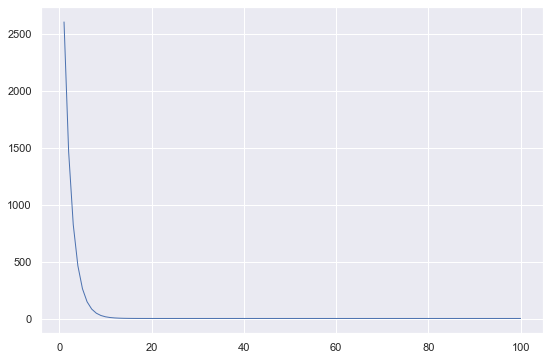

In [10]:
plt.plot(range(1, len(gd.mse_)+1), gd.mse_, linewidth=1);

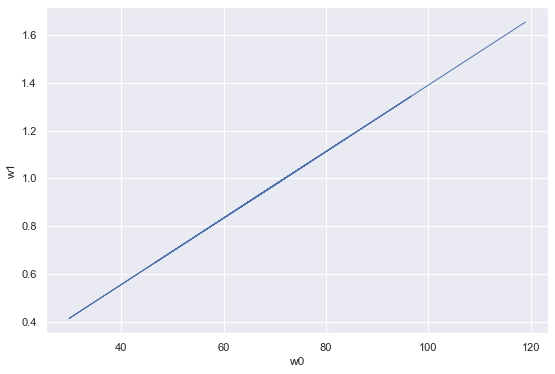

In [9]:
plt.plot(np.array(gd.weights_).T.tolist()[0], np.array(gd.weights_).T.tolist()[1], linewidth=1)
plt.xlabel('w0')
plt.ylabel('w1');